In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

In [19]:
def get_tiles(image):
    tiles = []
    num_tiles_x = int(np.floor(w/tile_size))
    num_tiles_y = int(np.floor(h/tile_size))
    for i in range(num_tiles_y):
        for j in range(num_tiles_x):
            tiles.append(image[i*tile_size:(i+1)*tile_size, j*tile_size:(j+1)*tile_size])
    tiles = np.array(tiles)
    return tiles

In [20]:
def compute_gradient(image):
    Sx = np.array([[-1, 1], [-1, 1]])/4
    Sy = np.array([[-1, -1,], [1, 1]])/4
    St = np.array([[1, 1],[1, 1]])/4

    if image.dtype in [int, "uint8"]:
        image = image.astype("float32") / 255.0

    Gx = scipy.signal.convolve2d(image, Sx, mode='same')
    Gy = scipy.signal.convolve2d(image, Sy, mode='same')
    Gt = scipy.signal.convolve2d(image, St, mode='same')
    return [i.reshape(tile_size**2) for i in [Gx, Gy, Gt]]

In [21]:
def lucas_kanade(im1, im2):
    
    tiles_one = get_tiles(im1)
    tiles_two = get_tiles(im2)
    diffs = tiles_one - tiles_two
    
    V = []
    for d in diffs:
        Gx, Gy, Gt = compute_gradient(d)
        A = np.array([Gx, Gy]).T
        v = np.linalg.inv(A.T@A)@A.T@-Gt
        V.append(v)
    V = np.array(V)
    X = np.arange(np.floor(tile_size/2), np.floor(w/tile_size)*tile_size, tile_size)
    Y = np.arange(np.floor(tile_size/2), np.floor(h/tile_size)*tile_size, tile_size)
    P = np.array([[a,b] for a in X for b in Y])
    fig, axs = plt.subplots(1, 2, figsize=(20,20))
    axs[0].imshow(im1)
    axs[0].quiver(P[:, 0], P[:,1], V[:,0], V[:,1], angles='xy', scale_units="xy")
    axs[1].imshow(im2)
    plt.show()

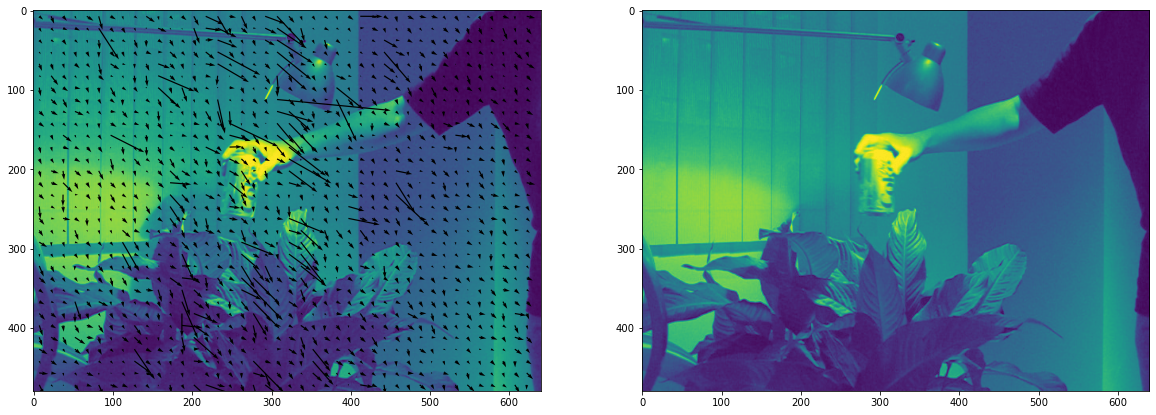

In [23]:
im1 = cv2.imread('images/Coke1.jpg', cv2.IMREAD_GRAYSCALE)
im2 = cv2.imread('images/Coke2.jpg', cv2.IMREAD_GRAYSCALE)
tile_size = 15
h, w = im1.shape
lucas_kanade(im1, im2)